# C-More

In [1]:
import tweepy
import pandas as pd

In [2]:
# Twitter API v2

bearer_token = ''

client = tweepy.Client(bearer_token=bearer_token)

### 1. Get tweets and store them in  a data frame

In [118]:
query = "Galp -is:retweet lang:pt"

# maches tweets with words Galp, excluding retweets for tweets in PT (app language?)

In [119]:
response = client.get_recent_tweets_count(query, granularity="day") # count of tweets for the last 7 days
# granularity can be minute, hour or day

In [5]:
for count in response.data:
    print(count)

{'end': '2022-07-16T00:00:00.000Z', 'start': '2022-07-15T12:12:49.000Z', 'tweet_count': 7}
{'end': '2022-07-17T00:00:00.000Z', 'start': '2022-07-16T00:00:00.000Z', 'tweet_count': 19}
{'end': '2022-07-18T00:00:00.000Z', 'start': '2022-07-17T00:00:00.000Z', 'tweet_count': 15}
{'end': '2022-07-19T00:00:00.000Z', 'start': '2022-07-18T00:00:00.000Z', 'tweet_count': 28}
{'end': '2022-07-20T00:00:00.000Z', 'start': '2022-07-19T00:00:00.000Z', 'tweet_count': 16}
{'end': '2022-07-21T00:00:00.000Z', 'start': '2022-07-20T00:00:00.000Z', 'tweet_count': 14}
{'end': '2022-07-22T00:00:00.000Z', 'start': '2022-07-21T00:00:00.000Z', 'tweet_count': 33}
{'end': '2022-07-22T12:12:49.000Z', 'start': '2022-07-22T00:00:00.000Z', 'tweet_count': 12}


In [6]:
total = 0

for i, count in enumerate(response.data):
    if i > 0 and i < 7:
        total += count['tweet_count']
        print(i, count['tweet_count'], total)

1 19 19
2 15 34
3 28 62
4 16 78
5 14 92
6 33 125


In [7]:
data = []

for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              query, 
                              start_time="2022-07-16T00:00:00Z", 
                              end_time="2022-07-22T00:00:00Z", 
                              max_results=100, 
                              tweet_fields=['lang', 'created_at', 'public_metrics']).flatten(): # default limit is inf
    
    data.append([tweet.id, 
                 tweet.text, 
                 tweet.lang, 
                 tweet.public_metrics['retweet_count'], 
                 tweet.public_metrics['reply_count'], 
                 tweet.public_metrics['like_count'], 
                 tweet.public_metrics['quote_count'], 
                 tweet.created_at
                ])

df_galp = pd.DataFrame(data, columns = ['id', 'text', 'lang', 'retweets', 'replies', 'likes', 'quotes', 'created_at'])

In [8]:
df_galp

,id,text,lang,retweets,replies,likes,quotes,created_at
0,1550250030476496900,Galp compra por 140 milhões os 25% da Titan So...,pt,0,0,0,0,2022-07-21 22:43:04+00:00
1,1550246814963712001,A Galp convida portugueses a pensar fora do ca...,pt,0,0,0,0,2022-07-21 22:30:17+00:00
2,1550243011350740992,"Mais um ano que renovo o cartão jovem, mais um...",pt,0,0,0,0,2022-07-21 22:15:10+00:00
3,1550242176407425024,@davidkirzner @LiberalNova @LiberalPT Achas? A...,pt,0,0,0,0,2022-07-21 22:11:51+00:00
4,1550240739170439169,#sicnoticias Não sei! Com a França a construir...,pt,0,0,0,0,2022-07-21 22:06:08+00:00
...,...,...,...,...,...,...,...,...
120,1548262922081619968,"""Galp e Repsol mais do que triplicam margens d...",pt,0,0,6,0,2022-07-16 11:07:00+00:00
121,1548246381332033538,@SICNoticias Encontraram a pólvora… 🙄 bastava ...,pt,0,0,2,0,2022-07-16 10:01:16+00:00
122,1548239527847682048,@mpradoexpresso @Joaogalamba @expresso @mprado...,pt,0,2,0,0,2022-07-16 09:34:02+00:00
123,1548234462906834946,😃 ESPERAMOS POR TI EM SINTRA 😃\n\nVisita-nos e...,pt,0,0,1,0,2022-07-16 09:13:55+00:00


In [9]:
df_galp['lang'].value_counts()

pt    125
Name: lang, dtype: int64

All our tweets are in Portuguese, so we can drop this column.

In [10]:
df_galp.drop('lang', axis=1, inplace=True)

In [11]:
df_galp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          125 non-null    int64              
 1   text        125 non-null    object             
 2   retweets    125 non-null    int64              
 3   replies     125 non-null    int64              
 4   likes       125 non-null    int64              
 5   quotes      125 non-null    int64              
 6   created_at  125 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 7.0+ KB


In [12]:
# save data frame to .pkl

df_galp.to_pickle('data_galp.pkl')

### 2. Process text

In [12]:
import nltk
from nltk.tokenize import TweetTokenizer
import string

In [13]:
# select longest tweet for testing purposes

test_text = sorted(df_galp['text'], key=lambda x: len(x), reverse=True)[0]

test_text

'@FBenfica1904 @tiagojcgodinho @PSSantiago88 @SLBenfica que dobrar de espinha épico. Sabes que os gajos que estão colocados em "gaiolas douradas" na EDP ou na GALP nunca podem ser transferidos para outras empresas, certo? Um jogador de futebol pode ser transferido desde que todos os stakeholders aceitem... é função do Benfica ajudar'

In [14]:
# test tweet tokenizer

tweet_tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
# redule_len=True replaces repeated character sequences of length 3 or greater with sequences of length 3
# examples: waaaaayyyy --> waaayyy
# strip_handles=True removes Twitter handles (@xxxx...)

tweet_tokenizer.tokenize(test_text)

['que',
 'dobrar',
 'de',
 'espinha',
 'épico',
 '.',
 'Sabes',
 'que',
 'os',
 'gajos',
 'que',
 'estão',
 'colocados',
 'em',
 '"',
 'gaiolas',
 'douradas',
 '"',
 'na',
 'EDP',
 'ou',
 'na',
 'GALP',
 'nunca',
 'podem',
 'ser',
 'transferidos',
 'para',
 'outras',
 'empresas',
 ',',
 'certo',
 '?',
 'Um',
 'jogador',
 'de',
 'futebol',
 'pode',
 'ser',
 'transferido',
 'desde',
 'que',
 'todos',
 'os',
 'stakeholders',
 'aceitem',
 '...',
 'é',
 'função',
 'do',
 'Benfica',
 'ajudar']

In [15]:
# punctuation

punct = string.punctuation

punct += "’" # add "’" to punct
punct += "…" # add "…" to punct
punct += "..." # add "..." to punct

punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’…...'

In [16]:
# tokenize text and remove punctuation

def tokens_nopunct(text):
    
    tokens = [token for token in TweetTokenizer(reduce_len=True, strip_handles=True).tokenize(text)]
    return [token for token in tokens if token not in punct]

In [17]:
# teste palavras compostas com hifenização

tokens_nopunct("caso de teste: palavra-com-hífenes - esta é uma palavra composta por justaposição que mantém o hífen")

['caso',
 'de',
 'teste',
 'palavra-com-hífenes',
 'esta',
 'é',
 'uma',
 'palavra',
 'composta',
 'por',
 'justaposição',
 'que',
 'mantém',
 'o',
 'hífen']

In [18]:
tokens_nopunct(test_text)

['que',
 'dobrar',
 'de',
 'espinha',
 'épico',
 'Sabes',
 'que',
 'os',
 'gajos',
 'que',
 'estão',
 'colocados',
 'em',
 'gaiolas',
 'douradas',
 'na',
 'EDP',
 'ou',
 'na',
 'GALP',
 'nunca',
 'podem',
 'ser',
 'transferidos',
 'para',
 'outras',
 'empresas',
 'certo',
 'Um',
 'jogador',
 'de',
 'futebol',
 'pode',
 'ser',
 'transferido',
 'desde',
 'que',
 'todos',
 'os',
 'stakeholders',
 'aceitem',
 'é',
 'função',
 'do',
 'Benfica',
 'ajudar']

In [19]:
# nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('portuguese')) # stopwords for portuguese

In [20]:
len(stopwords)

204

In [21]:
# remove stop words

def remove_stop(tokens):
    return [token for token in tokens if token not in stopwords]

In [22]:
pipeline = [str.lower, tokens_nopunct, remove_stop] # this will be our default pipeline
# lowercases words, tokenizes text, removes punctuation and removes stop words

def process_text(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [23]:
process_text(test_text, pipeline)

['dobrar',
 'espinha',
 'épico',
 'sabes',
 'gajos',
 'colocados',
 'gaiolas',
 'douradas',
 'edp',
 'galp',
 'nunca',
 'podem',
 'ser',
 'transferidos',
 'outras',
 'empresas',
 'certo',
 'jogador',
 'futebol',
 'pode',
 'ser',
 'transferido',
 'desde',
 'todos',
 'stakeholders',
 'aceitem',
 'função',
 'benfica',
 'ajudar']

In [24]:
df_galp['tokens'] = df_galp['text'].apply(process_text, pipeline=pipeline)

In [25]:
df_galp

,id,text,retweets,replies,likes,quotes,created_at,tokens
0,1550250030476496900,Galp compra por 140 milhões os 25% da Titan So...,0,0,0,0,2022-07-21 22:43:04+00:00,"[galp, compra, 140, milhões, 25, titan, solar,..."
1,1550246814963712001,A Galp convida portugueses a pensar fora do ca...,0,0,0,0,2022-07-21 22:30:17+00:00,"[galp, convida, portugueses, pensar, carro, di..."
2,1550243011350740992,"Mais um ano que renovo o cartão jovem, mais um...",0,0,0,0,2022-07-21 22:15:10+00:00,"[ano, renovo, cartão, jovem, ano, câmara, aces..."
3,1550242176407425024,@davidkirzner @LiberalNova @LiberalPT Achas? A...,0,0,0,0,2022-07-21 22:11:51+00:00,"[achas, moça, terminou, curso, pouco, tempo, c..."
4,1550240739170439169,#sicnoticias Não sei! Com a França a construir...,0,0,0,0,2022-07-21 22:06:08+00:00,"[#sicnoticias, sei, frança, construir, nuclear..."
...,...,...,...,...,...,...,...,...
120,1548262922081619968,"""Galp e Repsol mais do que triplicam margens d...",0,0,6,0,2022-07-16 11:07:00+00:00,"[galp, repsol, triplicam, margens, refinação, ..."
121,1548246381332033538,@SICNoticias Encontraram a pólvora… 🙄 bastava ...,0,0,2,0,2022-07-16 10:01:16+00:00,"[encontraram, pólvora, 🙄, bastava, ver, destaq..."
122,1548239527847682048,@mpradoexpresso @Joaogalamba @expresso @mprado...,0,2,0,0,2022-07-16 09:34:02+00:00,"[curiosidade, falou-se, alguma, coisa, sobre, ..."
123,1548234462906834946,😃 ESPERAMOS POR TI EM SINTRA 😃\n\nVisita-nos e...,0,0,1,0,2022-07-16 09:13:55+00:00,"[😃, esperamos, ti, sintra, 😃, visita-nos, 10:0..."


### 3. Extract keywords

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import textacy
from textacy.extract.kwic import keyword_in_context
textacy.set_doc_extensions("extract")

import re

#### 3.1 Compute term frequency (with n-grams)

In [27]:
def compute_freq(df, tokenizer=tokens_nopunct, stop_words=stopwords, n_min=1, n_max=1, min_df=1):
    
    bow_vectorizer = CountVectorizer(lowercase=True, 
                                     tokenizer=tokenizer, 
                                     stop_words=stop_words, 
                                     ngram_range=(n_min, n_max), 
                                     min_df=min_df)
    
    cv_bow = bow_vectorizer.fit_transform(df['text'])
    df_cv_bow = pd.DataFrame(cv_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
    
    df_freq = pd.DataFrame(df_cv_bow.sum(axis = 0).index, columns=['token'])
    df_freq['freq'] = df_cv_bow.sum(axis = 0).values
    df_freq = df_freq.query('freq >= @min_df') # we are using 1 as default
    
    df_freq['n-gram size'] = df_freq['token'].map(lambda x: len(str.split(x))) # size of n-gram
    df_freq.drop(df_freq[df_freq['n-gram size'] > n_max].index, inplace=True) # removes rows with n-gram size greater than expected

    return df_freq

In [28]:
df_galp_freq = compute_freq(df_galp, n_max=2)

In [29]:
df_galp_freq['n-gram size'].value_counts()

2    1708
1    1247
Name: n-gram size, dtype: int64

In [30]:
# number of unigrams and bigrams for top-20 terms

df_galp_freq.sort_values('freq', ascending=False, inplace=True)
df_galp_freq.head(20)['n-gram size'].value_counts()

1    18
2     2
Name: n-gram size, dtype: int64

In [31]:
# number of unigrams and bigrams for top-20 terms (weighted)

df_galp_freq['weighted_freq'] = df_galp_freq['freq'] * df_galp_freq['n-gram size']
df_galp_freq.sort_values('weighted_freq', ascending=False, inplace=True)

df_galp_freq.head(20)['n-gram size'].value_counts()

1    13
2     7
Name: n-gram size, dtype: int64

In [32]:
# top-20 terms (weighted)

df_galp_freq.set_index('token', inplace=True)
df_galp_freq.head(20)

,freq,n-gram size,weighted_freq
token,,,
galp,118,1,118
edp galp,10,2,20
bolsa lisboa,9,2,18
edp,15,1,15
q,12,1,12
140 milhões,6,2,12
lisboa,11,1,11
bolsa,10,1,10
lucros,9,1,9


#### 3.2 Extract keywords with textacy

In [17]:
# create corpus

# download PT language model: python -m spacy download pt_core_news_sm

corpus = textacy.Corpus("pt_core_news_sm", df_galp['text'])

In [18]:
print(corpus)

Corpus(125 docs, 3880 tokens)


In [20]:
[doc._.preview for doc in corpus[0:5]]

['Doc(16 tokens: "Galp compra por 140 milhões os 25% da Titan Sol...")',
 'Doc(45 tokens: "A Galp convida portugueses a pensar fora do car...")',
 'Doc(50 tokens: "Mais um ano que renovo o cartão jovem, mais um ...")',
 'Doc(54 tokens: "@davidkirzner @LiberalNova @LiberalPT Achas? A ...")',
 'Doc(58 tokens: "#sicnoticias Não sei! Com a França a construir ...")']

In [80]:
# extract keyterms with textrank

kt_weights = Counter()

for doc in corpus:
    keyterms = doc._.extract_keyterms("textrank", normalize='lower', window_size=2, edge_weighting="binary", topn=10)

    kt_weights.update(dict(keyterms))

In [81]:
# top-20 most relevant terms

kt_weights.most_common(20)

[('galp', 4.303822619172276),
 ('lisboa', 0.6786423918260822),
 ('🤣 🤣 🤣 🤣 🤣', 0.5470804083766023),
 ('bolsa', 0.43885005426209533),
 ('barba 🤣 🤣 🤣', 0.38460285921268805),
 ('@nadapraveraqui2 @marianagvas @sexogratweeto', 0.38350792572316306),
 ('galinha ficou doente', 0.36970766359814944),
 ('galp 🙄 https://t.co/ursjelegp8', 0.3652779243711237),
 ('edp', 0.3432746438772944),
 ('@davidkirzner @homemdasteclas @goncalopinto93', 0.3230473423692231),
 ('titan', 0.31523819242421325),
 ('cacifos locky disponíveis', 0.2899288828365792),
 ('@fbenfica1904 @mestredounive19 @pssantiago88', 0.279178908904886),
 ('baixa ligeira', 0.2590227821603853),
 ('alta', 0.24895891256223174),
 ('postos', 0.247201474148258),
 ('cartão galp frota', 0.24383126204299288),
 ('@ruisilv30012076 @liberalnova @liberalpt', 0.24103746783237137),
 ('pequeno génio', 0.2402886497064576),
 ('bcp', 0.21541061213860058)]

Some of the keywords have **emojis**. Let's remove them, along with **twitter handles and links**.

In [82]:
# unicode for emojis

emojis = ['🤣', '🙄', '🧐', '🤔']

for emoji in emojis:
    print('U+{:X}'.format(ord(emoji)))

U+1F923
U+1F644
U+1F9D0
U+1F914


In [83]:
# remove twitter handles, links and emojis from the list of most relevant keywords 
# unicode full emoji list: https://unicode.org/emoji/charts/full-emoji-list.html

regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F911-\U0001F99F"  # extra
                           "]+", flags = re.UNICODE)

kt_weights_clean = {}

for kt, weight in kt_weights.items():
    if not (kt.startswith('@') or 'http' in kt):
        if regex_pattern.sub(r'', kt) == kt:
            kt_weights_clean[kt] = weight
            
# we can also try the package emoji to identify and remove the emojis: https://pypi.org/project/emoji/#description

In [84]:
# top-20 most relevant terms (cleaned)

list(sorted(kt_weights_clean.items(), key=lambda x: x[1], reverse=True))[0:20]

[('galp', 4.303822619172276),
 ('lisboa', 0.6786423918260822),
 ('bolsa', 0.43885005426209533),
 ('galinha ficou doente', 0.36970766359814944),
 ('edp', 0.3432746438772944),
 ('titan', 0.31523819242421325),
 ('cacifos locky disponíveis', 0.2899288828365792),
 ('baixa ligeira', 0.2590227821603853),
 ('alta', 0.24895891256223174),
 ('postos', 0.247201474148258),
 ('cartão galp frota', 0.24383126204299288),
 ('pequeno génio', 0.2402886497064576),
 ('bcp', 0.21541061213860058),
 ('mello galpões', 0.21464893193848372),
 ('verde', 0.21394557199518868),
 ('galp energia', 0.20559899157326295),
 ('psi', 0.2035305844748165),
 ('lucros', 0.19544914351932988),
 ('ren', 0.18166777626510225),
 ('sentimento dominante', 0.17595408934770562)]

Of the top-20 terms, 3 seem particularly strange:

* galinha ficou doente
* cacifos locky disponíveis
* mello galpões

Let's check their context.

In [120]:
# docs with the word 'galinha' in our corpus

kwic_list = []

for doc in corpus:
    if len(list(keyword_in_context(doc, "galinha"))) > 0:
        kwic_list.append(list(keyword_in_context(doc, "galinha")))

for kwic in kwic_list:
    for tup in kwic:
        print(re.sub(r'[\n\t]', ' ', tup[0]) + ' [' + tup[1] + '] ' + re.sub(r'[\n\t]', ' ', tup[2]))

A  [GALINHA]  FICOU DOENTE E O GALP NEM LIGOU


This seems to be a strange sentence with no connection to the company and it would most probably be discarded if we had more tweets.

In [123]:
# docs with the word 'cacifos' in our corpus

kwic_list = []

for doc in corpus:
    if len(list(keyword_in_context(doc, "cacifos"))) > 0:
        kwic_list.append(list(keyword_in_context(doc, "cacifos")))

for kwic in kwic_list:
    for tup in kwic:
        print(re.sub(r'[\n\t]', ' ', tup[0]) + ' [' + tup[1] + '] ' + re.sub(r'[\n\t]', ' ', tup[2]))

 [Cacifos]  Locky disponíveis nos postos de abastecimento da 
 [Cacifos]  Locky estão disponíveis nos postos de abastecimen
co/46QasAvJH4  #ecommerce #noticias #galp #locky # [cacifos] locky
positadamente para nos obrigar a alugar um destes  [cacifos] . Num estado de direito isto seria proibido. https
rceria com a Galp para instalação de nova rede de  [cacifos]  https://t.co/D0b22QibVf


'Cacifos locky' is indeed a relevant term. The word 'disponíveis' could have been discarded, but the result is reasonable.

In [124]:
# docs with the word 'galpões' in our corpus

kwic_list = []

for doc in corpus:
    if len(list(keyword_in_context(doc, "galpões"))) > 0:
        kwic_list.append(list(keyword_in_context(doc, "galpões")))

for kwic in kwic_list:
    for tup in kwic:
        print(re.sub(r'[\n\t]', ' ', tup[0]) + ' [' + tup[1] + '] ' + re.sub(r'[\n\t]', ' ', tup[2]))

Confira isso: Mello  [Galpões]  e Imóveis - Imobiliária Especialzada em Galpões h
o Galpões e Imóveis - Imobiliária Especialzada em  [Galpões]  https://t.co/Jq6HQKLQ2jões+e+Imóveis+-+Imobiliári
QKLQ2jões+e+Imóveis+-+Imobiliária+Especialzada+em+ [Galpões] +Salvador+BA&amp;ypid=YN7993x4004963891424460984&a


In [125]:
print(df_galp[df_galp['text'].str.contains("galpões", case=False)]['text'].values)

['Confira isso: Mello Galpões e Imóveis - Imobiliária Especialzada em Galpões https://t.co/Jq6HQKLQ2jões+e+Imóveis+-+Imobiliária+Especialzada+em+Galpões+Salvador+BA&amp;ypid=YN7993x4004963891424460984&amp;cp=-12.98345~-38.45359&amp;eeptype=EntityFull&amp;localsource=localisting&amp;pc=OPALIOS&amp;ssp=1&amp;']


For some reason, we get this sentence with the query we used at the beginning. I believe we should have only results that match 'Galp' as a whole word and not matches like 'galpões'... Does it have something to do with the õ after galp? 

In [126]:
test_query = query = "usa -is:retweet lang:en"

test_data = []

for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              test_query, 
                              start_time="2022-07-16T00:00:00Z", 
                              end_time="2022-07-22T00:00:00Z", 
                              max_results=100, 
                              tweet_fields=['lang', 'created_at', 'public_metrics']).flatten(100):
    
    test_data.append([tweet.id, 
                      tweet.text, 
                      tweet.lang, 
                      tweet.public_metrics['retweet_count'], 
                      tweet.public_metrics['reply_count'], 
                      tweet.public_metrics['like_count'], 
                      tweet.public_metrics['quote_count'], 
                      tweet.created_at
                    ])

In [130]:
test_data

[[1550269385868451841,
  'Pinebluff, Kennebunk, ME, USA &gt; Time: 8:00 PM,  Temp: 77.1 degrees F,  Humidity: 76%,   Wind: SSW at 0.0 mph,  Barometer: 29.627 in. of  mercury',
  'en',
  0,
  0,
  0,
  0,
  datetime.datetime(2022, 7, 21, 23, 59, 58, tzinfo=datetime.timezone.utc)],
 [1550269370085015552,
  '@elisaperego78 Yes, they made a documentary about his experience, 5 or 6 months ago.  Meanwhile, in USA.  https://t.co/NXQyocHTnk',
  'en',
  0,
  0,
  0,
  0,
  datetime.datetime(2022, 7, 21, 23, 59, 55, tzinfo=datetime.timezone.utc)],
 [1550269358018019328,
  'CBT sessions are the best, where are all my ball busting subs at? 🥵🥵\n\n• findom femdom uk usa eu ballbust ball bust ballbusting slave finsub loser paypig pig dog beta sissy cuck sph cei joi session drain rinse •',
  'en',
  0,
  0,
  2,
  0,
  datetime.datetime(2022, 7, 21, 23, 59, 52, tzinfo=datetime.timezone.utc)],
 [1550269356759588864,
  '@kenliverpoolfc Now do healthcare. "USA number one!" Uggh🤦',
  'en',
  0,
  1,
  1,


In [135]:
for result in test_data:
    print(result[1] + '\n----------')

Pinebluff, Kennebunk, ME, USA &gt; Time: 8:00 PM,  Temp: 77.1 degrees F,  Humidity: 76%,   Wind: SSW at 0.0 mph,  Barometer: 29.627 in. of  mercury
----------
@elisaperego78 Yes, they made a documentary about his experience, 5 or 6 months ago.  Meanwhile, in USA.  https://t.co/NXQyocHTnk
----------
CBT sessions are the best, where are all my ball busting subs at? 🥵🥵

• findom femdom uk usa eu ballbust ball bust ballbusting slave finsub loser paypig pig dog beta sissy cuck sph cei joi session drain rinse •
----------
@kenliverpoolfc Now do healthcare. "USA number one!" Uggh🤦
----------
Capricorn Daily Horoscope – 22 July 2022 https://t.co/32etOShHvj #USA #US #UnitedStates #Sweden #Swiss #Europe #Euro #CaymanIsland #Gibraltar #England #Jordan #Oman #bahrain #Kuwait #canada https://t.co/oSASrMLCkx
----------
@JoJoFromJerz 🤣🤣🤣🤣🤣🤣🤣🤣
Ignorant! Fox is owned by one of the 6 people in the USA who own 90% of everything you watch and read. You people are seriously this Ignorant???
https://t.co/Kh

We get the expected results for this test (usa as a whole word and not hits like usability, for example).

<br>
---------- <b>Nota:</b> confirmar esta questão! ----------
<br><br>

### 4. Visualize keywords in wordclouds

In [137]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [138]:
def wordcloud(word_freq, title=None, max_words=100, additional_stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="viridis", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # remove additional stop words from frequency counter
    if additional_stopwords is not None:
        counter = {token: freq for (token, freq) in counter.items() 
                   if token not in additional_stopwords}
        
    wc.generate_from_frequencies(counter)
    
    plt.title(title, fontsize=16)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

#### 4.1. Wordcloud with term frequency

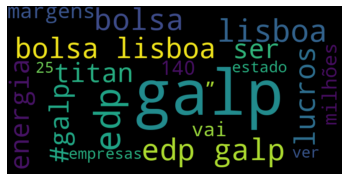

In [35]:
wordcloud(df_galp_freq['freq'], max_words=20, additional_stopwords=['q'])

#### 4.2. Wordcloud with term frequency (weighted)

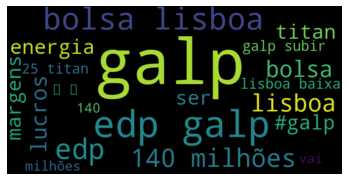

In [36]:
wordcloud(df_galp_freq['weighted_freq'], max_words=20, additional_stopwords=['q'])

#### 4.3. Wordcloud with textrank

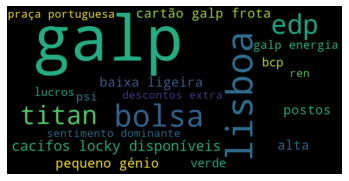

In [144]:
wordcloud(kt_weights_clean, max_words=20, additional_stopwords=['galinha ficou doente', 'mello galpões'])

We could also try to include emojis on our wordclouds: see http://amueller.github.io/word_cloud/auto_examples/emoji.html .